In [2]:
from sklearn import datasets, model_selection, linear_model, neural_network, preprocessing, model_selection

import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob, os


In [3]:
# First we load the data
#print((mnist.images[0]))
#mnist = datasets.load_digits()
#X,y = mnist.images,mnist.target
#X = X.reshape(len(X),-1)

images=[]#np.zeros(2628)
X=[]#np.zeros(2628)
y=[]
numTiles=12


for i,file in enumerate(glob.glob("rot-tiles/*.jpg")):
    split=file.split("_")
    #print(split)
    #print(i)
    #z = cv2.imread(file, cv2.IMREAD_GRAYSCALE),file.split("_")[1]
    #images.append(z) #file, tile number, rotation
    #y.append(file.split("_")[1])
    #print(file.split("_")[-1].split(".")[0])
    #if(split[-2]!='noshift'):
    #    continue
        
    images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE)) #file, tile number, rotation
    '''
    if(split[-2]=='DEC' and int(split[-1].split(".")[0])<5):
        y.append(int(split[1]))
    elif(split[-2]=='DEC' and int(split[-1].split(".")[0])>=5):
        y.append(int(split[1])+1)
    elif(split[-2]=='RA' and int(split[-1].split(".")[0])<5):
        y.append(int(split[1]))
    elif(split[-2]=='RA' and int(split[-1].split(".")[0])>=5):
        y.append(int(split[1])+numTiles)
    else:
        y.append(int(split[0]))
    ''' 
    y.append(int(split[0].split("/")[1]))

#print(images[1][0][0])
#print(images[0])

#X = images[0][:]
#y= images[1][:]
print(images[0])
X = np.asarray(images).reshape(len(images),-1)
#X=np.reshape(X,(2628,1))
print(X[0])
#for i in X:
#    print(np.shape(i))

#plt.imshow(X[0])



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 ... 0 0 0]


This tile is 67


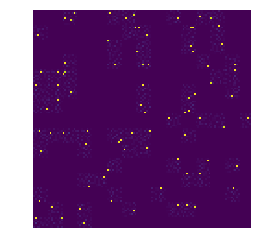

This tile is 125


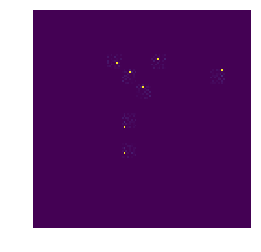

This tile is 37


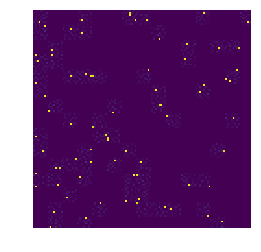

This tile is 129


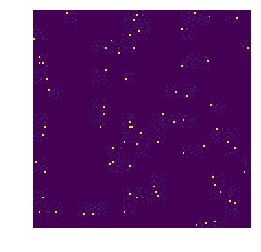

This tile is 84


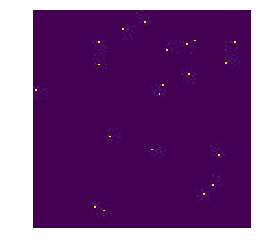

This tile is 33


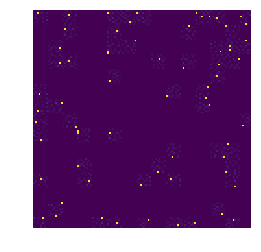

This tile is 23


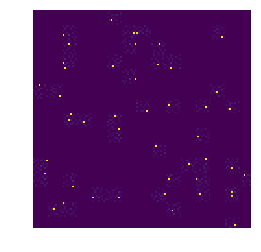

This tile is 38


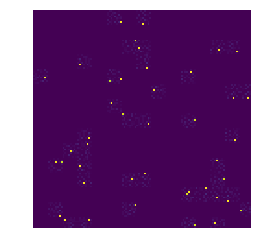

This tile is 69


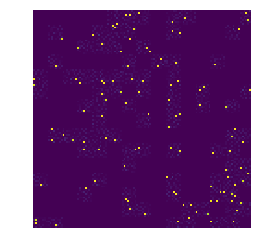

This tile is 17


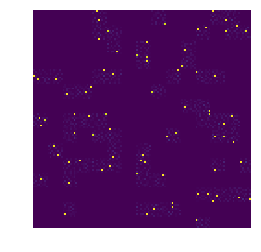

In [92]:
# Let's see what the data looks like
for idx in range(10):
    #print(idx)
    print("This tile is "+repr(y[idx]))
    plt.imshow(images[idx])
    plt.axis('off')
    plt.show()

In [5]:
scalar = preprocessing.MinMaxScaler()
scalar.fit(X)
X_normalized=scalar.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size=0.33, random_state=42)


/home/soud/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

predictions = clf.predict(X_test)

perc=0

for i in range(len(predictions)):
    #print(predictions[i], y_test[i])
    if y_test[i]==predictions[i]:
        perc+=1

print("Test scored: "+repr(perc/float(len(predictions))))
proba=clf.predict_proba(X_test)
print(proba)

/home/soud/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/soud/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test scored: 0.4616576297443842
[[0.01659713 0.00650564 0.00629975 ... 0.00212683 0.00801511 0.01271915]
 [0.0192822  0.01228152 0.00756765 ... 0.00337587 0.00527028 0.02432861]
 [0.01516707 0.00796356 0.0041467  ... 0.00226981 0.0056358  0.01755016]
 ...
 [0.03489227 0.00893038 0.01058882 ... 0.00278019 0.00767115 0.0158482 ]
 [0.00378249 0.01097375 0.0026265  ... 0.0048226  0.00301747 0.00663351]
 [0.00103659 0.00327208 0.00953288 ... 0.00244329 0.00543401 0.00194048]]


In [7]:
proba.shape

(2582, 144)

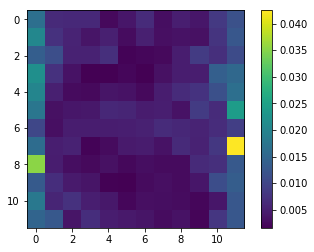

(2, 11)
5.0


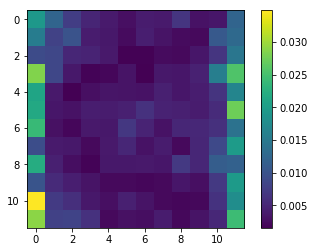

(9, 11)
11.045361017187261


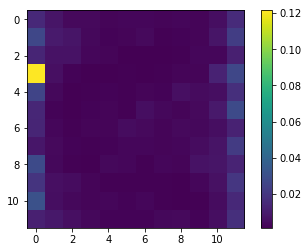

(3, 0)
0.0


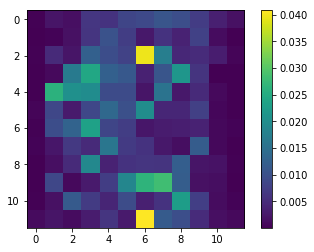

(2, 7)
9.055385138137417


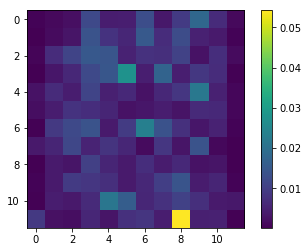

(11, 8)
0.0


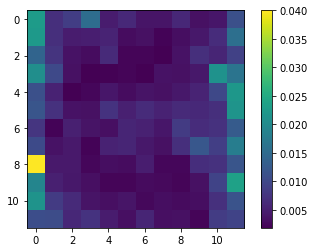

(2, 11)
12.529964086141668


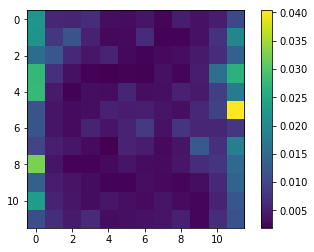

(10, 0)
12.083045973594572


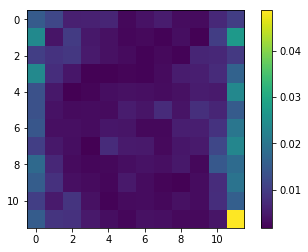

(11, 11)
0.0


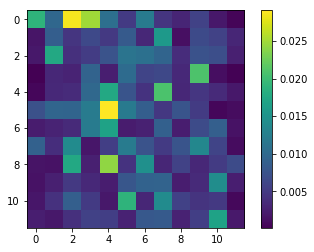

(5, 5)
1.0


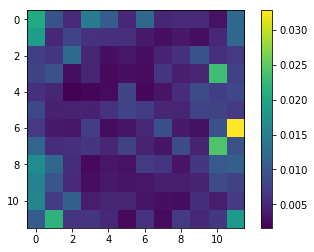

(7, 10)
1.4142135623730951


In [8]:
#print(proba[0])
for idx in range(10):
    plt.imshow(np.reshape(proba[idx], (12,12)))
    plt.colorbar()
    plt.show()
    print(y_test[idx]/12, y_test[idx]%12)#Actual coordinates of where tile is from
    print(np.sqrt((y_test[idx]/12 - predictions[idx]/12)**2.0 + (y_test[idx]%12 - predictions[idx]%12)**2.00 ))
    #print(max(proba[idx])/12, max(proba[idx])%12)
    #plt.imshow(np.reshape(y_test[idx], (12,12)))

0.539504260263


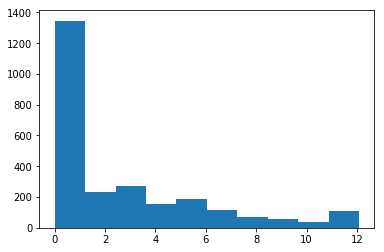

In [14]:
dist=[]
for idx in range(len(y_test)):
    d1 = np.sqrt((y_test[idx]/12 - predictions[idx]/12)**2.0 + (y_test[idx]%12 - predictions[idx]%12)**2.00)
    d2 = np.sqrt((12-y_test[idx]/12 - predictions[idx]/12)**2.0 + (y_test[idx]%12 - predictions[idx]%12)**2.00)
    dist.append(min(d1,d2))
    #print(y_test[idx]/12, y_test[idx]%12)#Actual coordinates of where tile is from
    #dist.append(np.sqrt((y_test[idx]/12 - predictions[idx]/12)**2.0 + (y_test[idx]%12 - predictions[idx]%12)**2.00))
    #print(max(proba[idx])/12, max(proba[idx])%12)
    #plt.imshow(np.reshape(y_test[idx], (12,12)))

plt.hist(dist)
sum1=0
for d in dist:
    if d<1.5:
        sum1+=1
        
print(sum1/float(len(y_test)))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 32  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [15  0 13 ...  0  0  0]]
[0 0 0 ... 0 0 0]


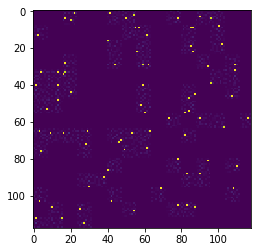

In [32]:
# First we load the data
#print((mnist.images[0]))
#mnist = datasets.load_digits()
#X,y = mnist.images,mnist.target
#X = X.reshape(len(X),-1)

images=[]#np.zeros(2628)
X_shift=[]#np.zeros(2628)
y_shift=[]
numTiles=12


for i,file in enumerate(glob.glob("tiles/*.jpg")):
    split=file.split("_")
    #print(split)
    #print(i)
    #z = cv2.imread(file, cv2.IMREAD_GRAYSCALE),file.split("_")[1]
    #images.append(z) #file, tile number, rotation
    #y.append(file.split("_")[1])
    #print(file.split("_"))
          
    if(split[-2]=='noshift'):
        continue
        
    images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE)) #file, tile number, rotation
    
    if(split[-2]=='DEC' and int(split[-1].split(".")[0])<5):
        y_shift.append(int(split[1]))
    elif(split[-2]=='DEC' and int(split[-1].split(".")[0])>=5):
        y_shift.append(int(split[1])+1)
    elif(split[-2]=='RA' and int(split[-1].split(".")[0])<5):
        y_shift.append(int(split[1]))
    elif(split[-2]=='RA' and int(split[-1].split(".")[0])>=5):
        y_shift.append(int(split[1])+numTiles)
    else:
        y_shift.append(int(split[1]))
     
    #y_shift.append(int(split[1]))

#print(images[1][0][0])
#print(images[0])

#X = images[0][:]
#y= images[1][:]
print(images[0])
plt.imshow(images[0])
X_shift = np.asarray(images).reshape(len(images),-1)
#X=np.reshape(X,(2628,1))
print(X[0])
#for i in X:
#    print(np.shape(i))

#plt.imshow(X[0])



Test scored: 0.5169082125603864


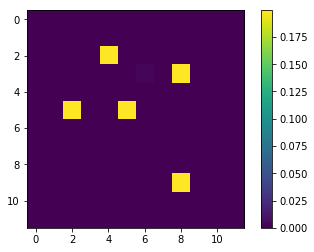

(1, 9)
2.23606797749979


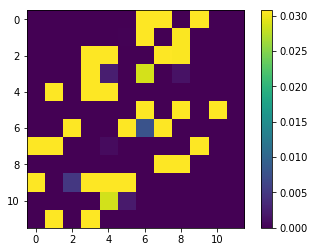

(0, 0)
6.324555320336759


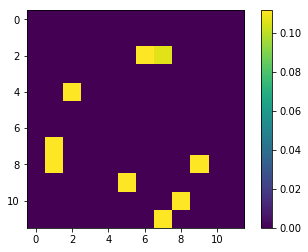

(6, 5)
5.0


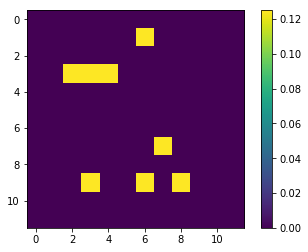

(8, 3)
5.0990195135927845


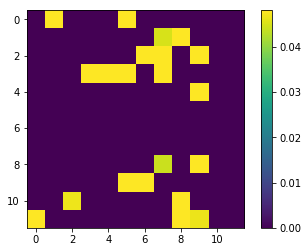

(0, 11)
7.615773105863909


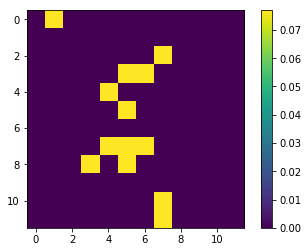

(6, 7)
3.1622776601683795


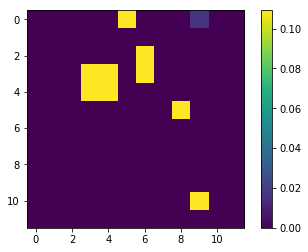

(6, 6)
3.605551275463989


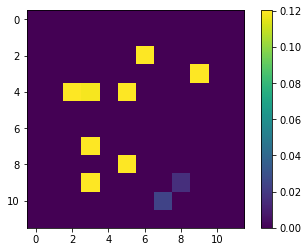

(9, 7)
4.47213595499958


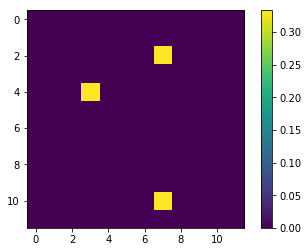

(7, 1)
3.605551275463989


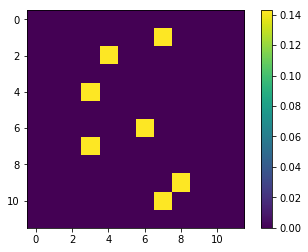

(5, 2)
7.211102550927978
0.113526570048


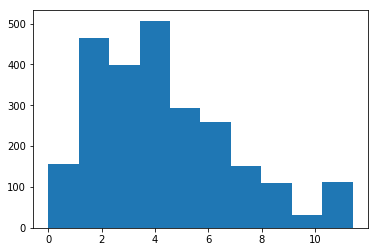

In [34]:
pred_shift=clf.predict(X_shift)

for i in range(len(pred_shift)):
    #print(predictions[i], y_test[i])
    if y_shift[i]==pred_shift[i]:
        perc+=1

print("Test scored: "+repr(perc/float(len(pred_shift))))
proba=clf.predict_proba(X_shift)

#print(proba[0])
for idx in range(10):
    plt.imshow(np.reshape(proba[idx], (12,12)))
    plt.colorbar()
    plt.show()
    print(y_shift[idx]/12, y_shift[idx]%12)#Actual coordinates of where tile is from
    print(np.sqrt((y_shift[idx]/12 - pred_shift[idx]/12)**2.0 + (y_shift[idx]%12 - pred_shift[idx]%12)**2.00 ))
    #print(max(proba[idx])/12, max(proba[idx])%12)
    #plt.imshow(np.reshape(y_test[idx], (12,12)))
    
dist=[]
for idx in range(len(y_shift)):
    d1 = np.sqrt((y_shift[idx]/12 - pred_shift[idx]/12)**2.0 + (y_shift[idx]%12 - pred_shift[idx]%12)**2.00)
    d2 = np.sqrt((12-y_shift[idx]/12 - pred_shift[idx]/12)**2.0 + (y_shift[idx]%12 - pred_shift[idx]%12)**2.00)
    dist.append(min(d1,d2))
    #print(y_test[idx]/12, y_test[idx]%12)#Actual coordinates of where tile is from
    #dist.append(np.sqrt((y_test[idx]/12 - predictions[idx]/12)**2.0 + (y_test[idx]%12 - predictions[idx]%12)**2.00))
    #print(max(proba[idx])/12, max(proba[idx])%12)
    #plt.imshow(np.reshape(y_test[idx], (12,12)))

plt.hist(dist)
sum1=0
for d in dist:
    if d<1.5:
        sum1+=1
        
print(sum1/float(len(y_shift)))


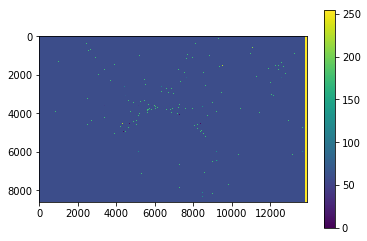

In [88]:
stars_found=cv2.imread('starsfound.png', cv2.IMREAD_GRAYSCALE)

#import HYG_reader
import imutils

stars_found = stars_found[20:500, 100:]
hw = 118*118
stars_found=imutils.resize(stars_found, width = hw, height = hw)
plt.imshow(stars_found*2)
plt.colorbar()


In [97]:
#tiles= 

X_stars = np.asarray(stars_found).reshape(len(stars_found),-1)


In [98]:
clf.predict(X_stars)
proba=clf.predict_proba(X_stars)


array([31, 31, 31, ..., 31, 31, 31])

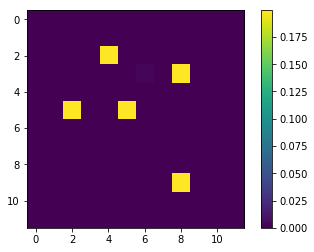

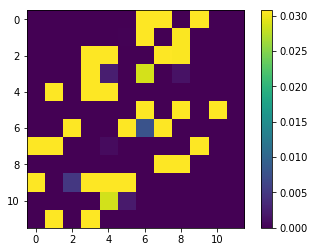

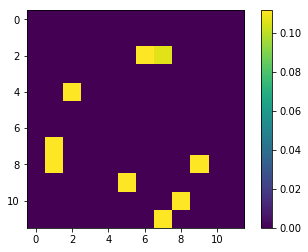

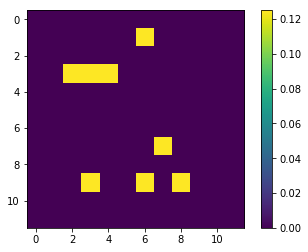

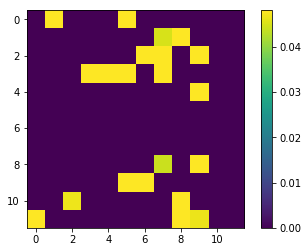

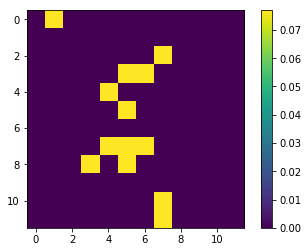

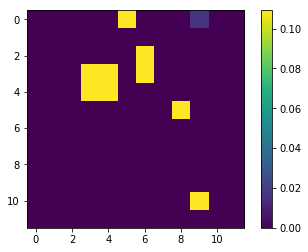

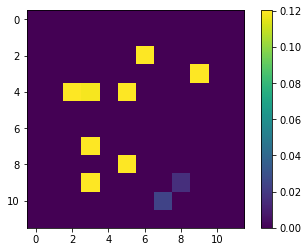

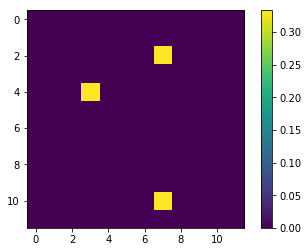

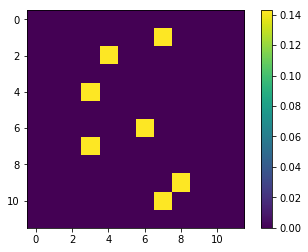

In [99]:
for idx in range(10):
    plt.imshow(np.reshape(proba[idx], (12,12)))
    plt.colorbar()
    plt.show()